In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r'/kaggle/input/nasa-asteroids-classification/nasa.csv')

In [4]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [5]:
df.shape

(4687, 40)

In [6]:
df.columns


Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

<Axes: xlabel='Hazardous', ylabel='count'>

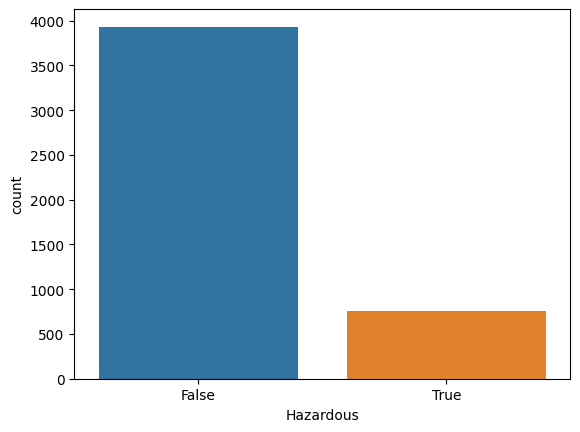

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'Hazardous',data = df)

Imbalanced Data

In [9]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

In [10]:
numerical_cols

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion'],
      dtype='object')

/tmp/ipykernel_33/4090864242.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10,4,i+1)
/tmp/ipykernel_33/4090864242.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10,4,i+1)
/tmp/ipykernel_33/4090864242.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10,4,i+1)
/tmp/ipykernel_33/4090864242.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10,4,i+1)
/tmp/ipykernel_33/4090864242.py:3: MatplotlibDeprecationWarning: Auto-remova

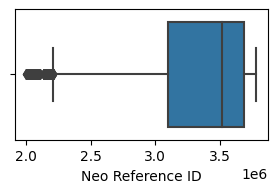

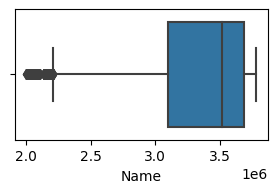

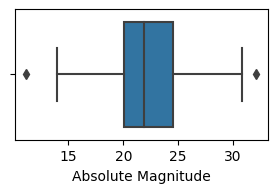

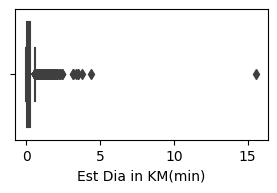

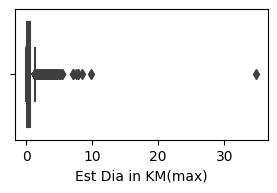

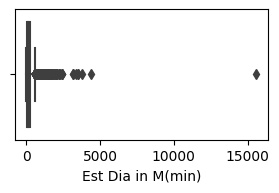

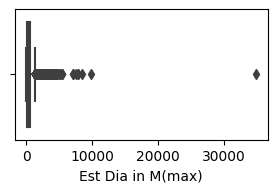

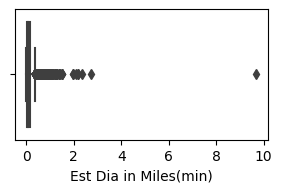

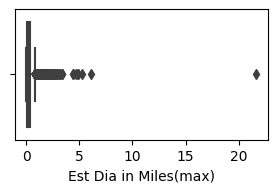

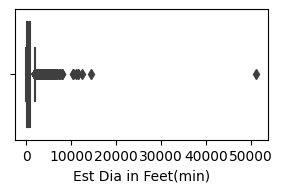

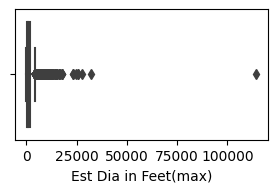

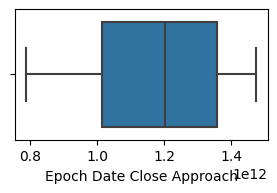

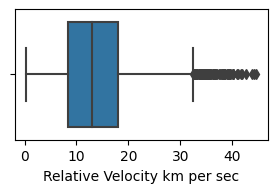

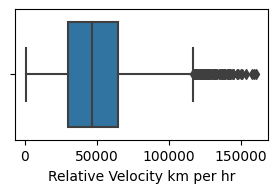

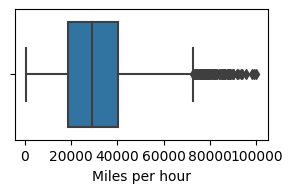

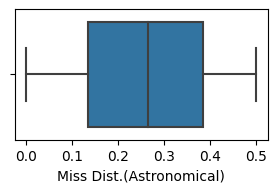

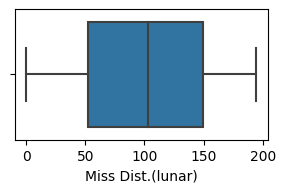

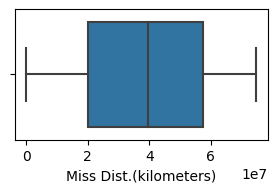

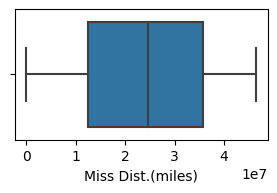

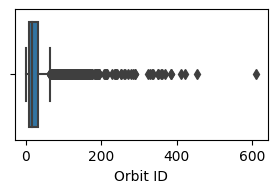

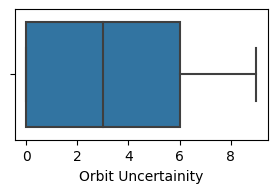

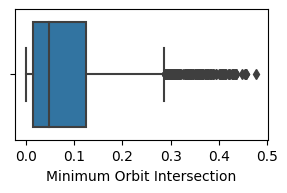

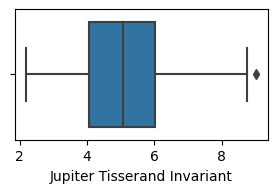

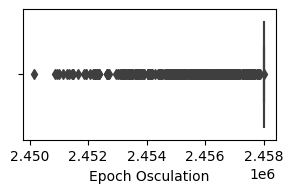

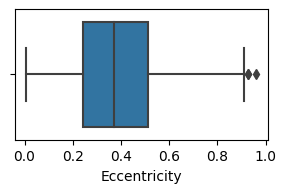

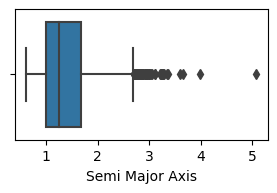

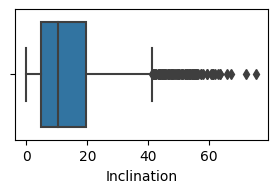

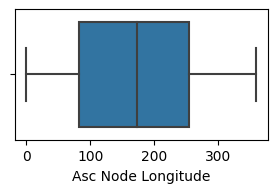

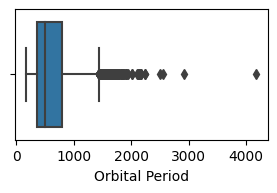

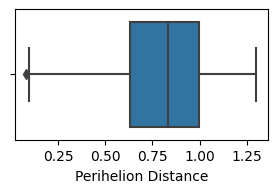

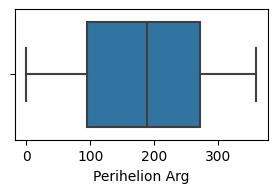

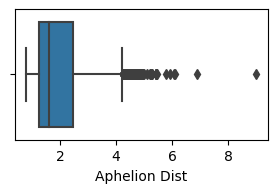

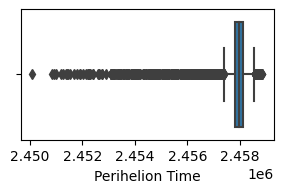

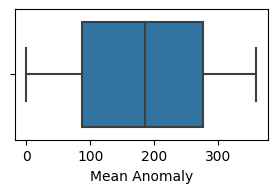

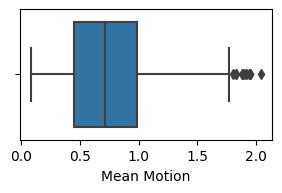

In [11]:
for i in range(len(numerical_cols)):
    plt.subplots(figsize = (15,20))
    plt.subplot(10,4,i+1)
    sns.boxplot(x = numerical_cols[i],data = df)

In [12]:
from scipy import stats
for i in numerical_cols:
    print('--------------------')
    print(i)
    print('--------------------')
    original_skew = stats.skew(df[i])
    print(f'{i} is {original_skew} skewed.')

--------------------
Neo Reference ID
--------------------
Neo Reference ID is -1.1022043941044943 skewed.
--------------------
Name
--------------------
Name is -1.1022043941044943 skewed.
--------------------
Absolute Magnitude
--------------------
Absolute Magnitude is 0.19386260120405538 skewed.
--------------------
Est Dia in KM(min)
--------------------
Est Dia in KM(min) is 17.66445170552084 skewed.
--------------------
Est Dia in KM(max)
--------------------
Est Dia in KM(max) is 17.664451705377353 skewed.
--------------------
Est Dia in M(min)
--------------------
Est Dia in M(min) is 17.664451705450194 skewed.
--------------------
Est Dia in M(max)
--------------------
Est Dia in M(max) is 17.66445170545056 skewed.
--------------------
Est Dia in Miles(min)
--------------------
Est Dia in Miles(min) is 17.664451705542685 skewed.
--------------------
Est Dia in Miles(max)
--------------------
Est Dia in Miles(max) is 17.664451705436168 skewed.
--------------------
Est Dia in F

# Est Dia in KM(min)

In [13]:
df['Est Dia in KM(min)'] = np.log(df['Est Dia in KM(min)'])

<Axes: xlabel='Est Dia in KM(min)'>

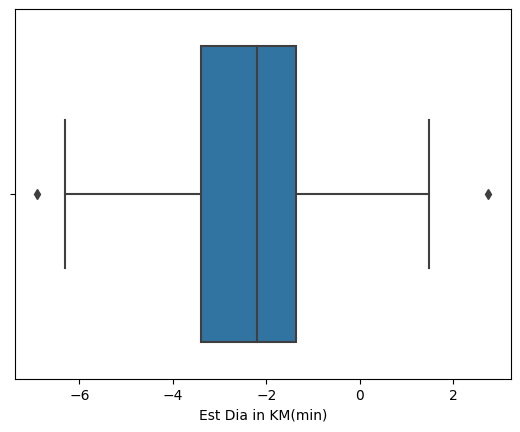

In [14]:
sns.boxplot(x = 'Est Dia in KM(min)',data = df)

# Est Dia in KM(max)

<Axes: xlabel='Est Dia in KM(max)'>

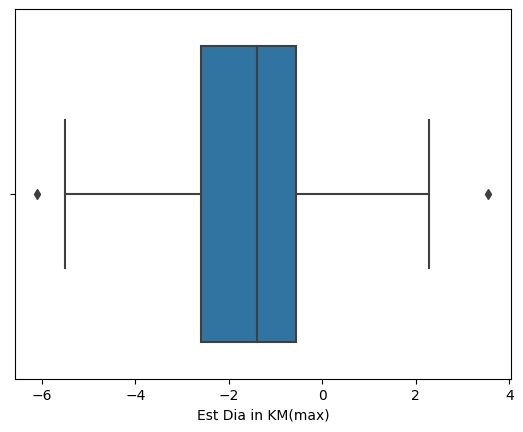

In [15]:
df['Est Dia in KM(max)'] = np.log(df['Est Dia in KM(max)'])
sns.boxplot(x = 'Est Dia in KM(max)',data = df)

# Est Dia in M(min)

<Axes: xlabel='Est Dia in M(min)'>

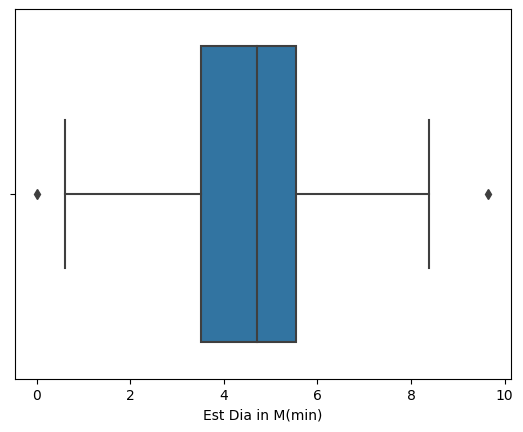

In [16]:
df['Est Dia in M(min)'] = np.log(df['Est Dia in M(min)'])
sns.boxplot(x = 'Est Dia in M(min)',data = df)

# Est Dia in M(max)

<Axes: xlabel='Est Dia in M(max)'>

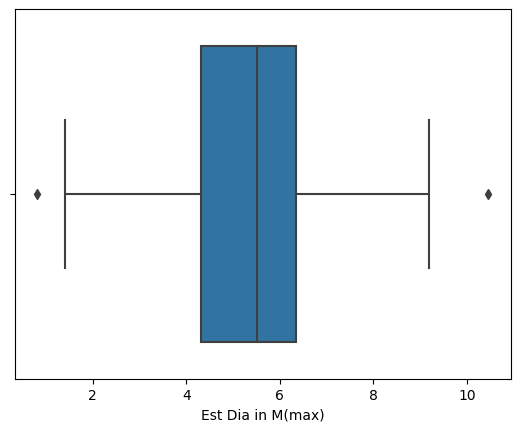

In [17]:
df['Est Dia in M(max)'] = np.log(df['Est Dia in M(max)'])
sns.boxplot(x = 'Est Dia in M(max)',data = df)

# Est Dia in Miles(min)

<Axes: xlabel='Est Dia in Miles(min)'>

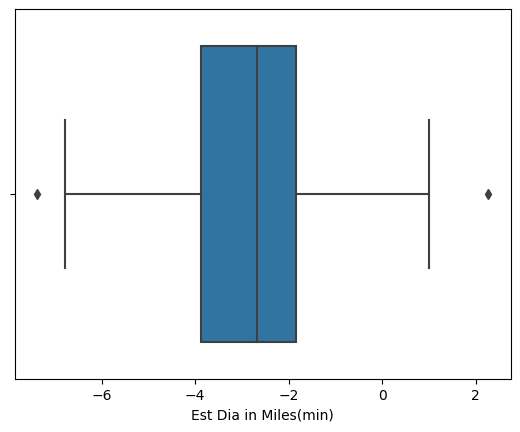

In [18]:
df['Est Dia in Miles(min)'] = np.log(df['Est Dia in Miles(min)'])
sns.boxplot(x = 'Est Dia in Miles(min)',data = df)

# Est Dia in Miles(max)

<Axes: xlabel='Est Dia in Miles(max)'>

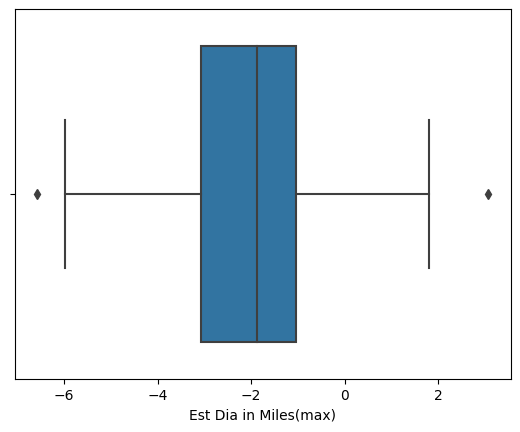

In [19]:
df['Est Dia in Miles(max)'] = np.log(df['Est Dia in Miles(max)'])
sns.boxplot(x = 'Est Dia in Miles(max)',data = df)

# Est Dia in Feet(min)

<Axes: xlabel='Est Dia in Feet(min)'>

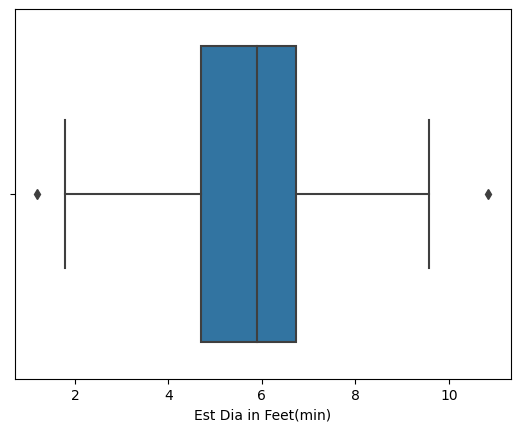

In [20]:
df['Est Dia in Feet(min)'] = np.log(df['Est Dia in Feet(min)'])
sns.boxplot(x = 'Est Dia in Feet(min)',data = df)

# Est Dia in Feet(max)

<Axes: xlabel='Est Dia in Feet(max)'>

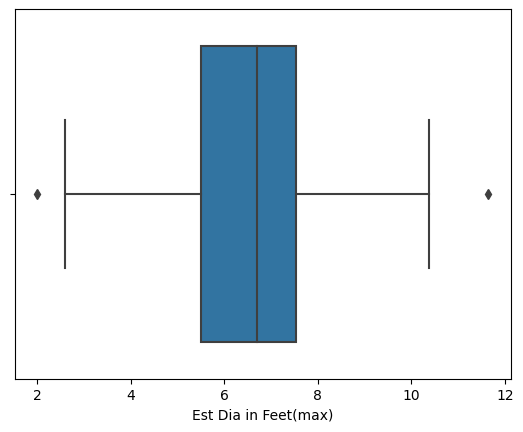

In [21]:
df['Est Dia in Feet(max)'] = np.log(df['Est Dia in Feet(max)'])
sns.boxplot(x = 'Est Dia in Feet(max)',data = df)

# Orbit ID

<Axes: xlabel='Orbit ID'>

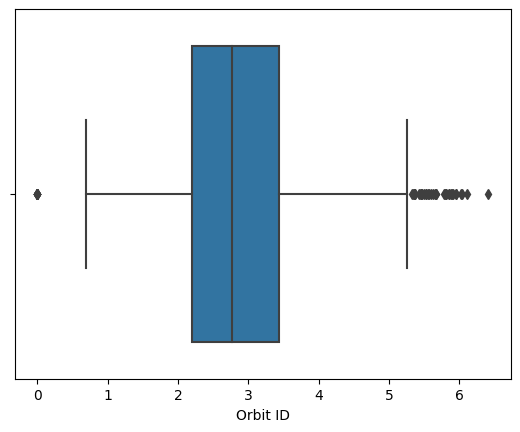

In [22]:
df['Orbit ID'] = np.log(df['Orbit ID'])
sns.boxplot(x = 'Orbit ID',data = df)

In [23]:
stats.skew(df['Orbit ID'])

0.37498054625771304

In [24]:
"""from scipy.stats.mstats import winsorize
df['Orbit ID'] = winsorize(df['Orbit ID'], limits=(0.1,0.99))
sns.boxplot(x = 'Orbit ID',data = df)"""

"from scipy.stats.mstats import winsorize\ndf['Orbit ID'] = winsorize(df['Orbit ID'], limits=(0.1,0.99))\nsns.boxplot(x = 'Orbit ID',data = df)"

# Epoch Osculation

In [25]:
print(df['Epoch Osculation'].describe())

count    4.687000e+03
mean     2.457724e+06
std      9.202975e+02
min      2.450164e+06
25%      2.458000e+06
50%      2.458000e+06
75%      2.458000e+06
max      2.458020e+06
Name: Epoch Osculation, dtype: float64


In [26]:
"""df['Epoch Osculation'] = np.log(df['Epoch Osculation'])
sns.boxplot(x = 'Epoch Osculation',data = df )"""

"df['Epoch Osculation'] = np.log(df['Epoch Osculation'])\nsns.boxplot(x = 'Epoch Osculation',data = df )"

# Semi Major Axis

<Axes: xlabel='Semi Major Axis'>

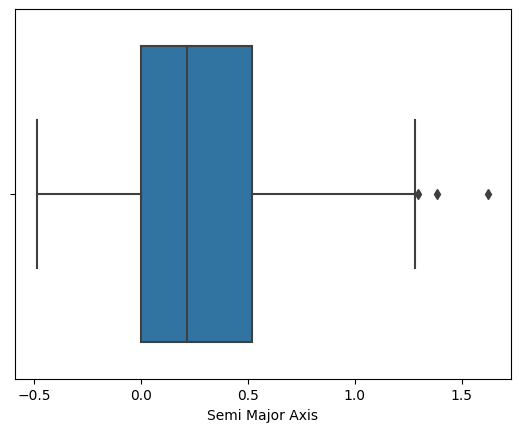

In [27]:
df['Semi Major Axis'] = np.log(df['Semi Major Axis'])
sns.boxplot(x = 'Semi Major Axis',data = df )

# Inclination

<Axes: xlabel='Inclination'>

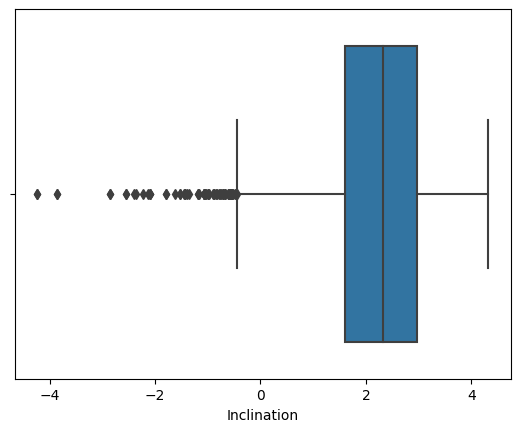

In [28]:
df['Inclination'] = np.log(df['Inclination'])
sns.boxplot(x = 'Inclination',data = df )

# Epoch Osculation

In [29]:
df.drop('Epoch Osculation',axis = 1,inplace = True)

# Orbital Period

<Axes: xlabel='Orbital Period'>

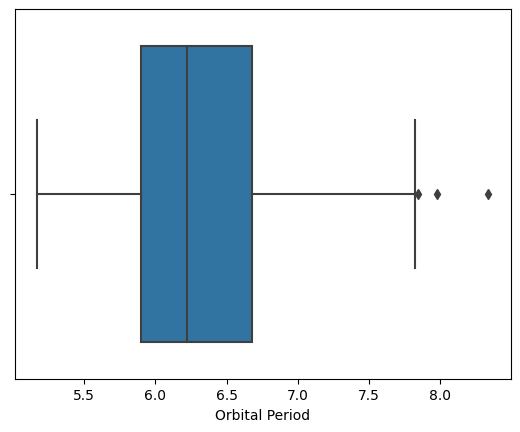

In [30]:
df['Orbital Period'] = np.log(df['Orbital Period'])
sns.boxplot(x = 'Orbital Period',data = df )

# Aphelion Dist

<Axes: xlabel='Aphelion Dist'>

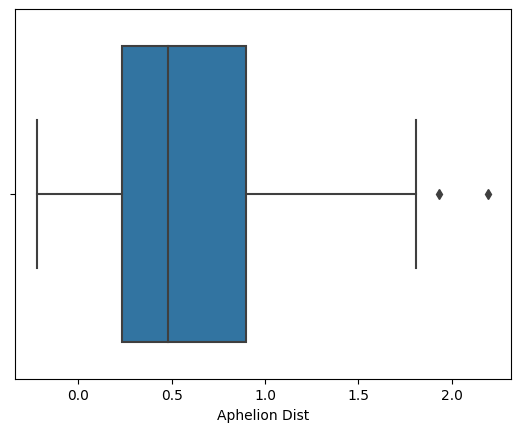

In [31]:
df['Aphelion Dist'] = np.log(df['Aphelion Dist'])
sns.boxplot(x = 'Aphelion Dist',data = df )

# Perihelion Time

In [32]:
df.drop('Perihelion Time',axis = 1,inplace = True)

In [33]:
numerical_df = df.select_dtypes(include=['int', 'float'])

In [34]:
corr_df = numerical_df.corr()

In [35]:
corr_df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion
Neo Reference ID,1.000000,1.000000,0.602381,-0.602381,-0.602381,-0.602381,-0.602381,-0.602381,-0.602381,-0.602381,...,-0.125071,0.027954,-0.164462,-0.026381,0.027954,0.130486,-0.007669,-0.015817,-0.051685,-0.020719
Name,1.000000,1.000000,0.602381,-0.602381,-0.602381,-0.602381,-0.602381,-0.602381,-0.602381,-0.602381,...,-0.125071,0.027954,-0.164462,-0.026381,0.027954,0.130486,-0.007669,-0.015817,-0.051685,-0.020719
Absolute Magnitude,0.602381,0.602381,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.361359,-0.214786,-0.486823,-0.011470,-0.214786,0.086966,0.031784,-0.284920,-0.049401,0.195652
Est Dia in KM(min),-0.602381,-0.602381,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.361359,0.214786,0.486823,0.011470,0.214786,-0.086966,-0.031784,0.284920,0.049401,-0.195652
Est Dia in KM(max),-0.602381,-0.602381,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.361359,0.214786,0.486823,0.011470,0.214786,-0.086966,-0.031784,0.284920,0.049401,-0.195652
Est Dia in M(min),-0.602381,-0.602381,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.361359,0.214786,0.486823,0.011470,0.214786,-0.086966,-0.031784,0.284920,0.049401,-0.195652
Est Dia in M(max),-0.602381,-0.602381,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.361359,0.214786,0.486823,0.011470,0.214786,-0.086966,-0.031784,0.284920,0.049401,-0.195652
Est Dia in Miles(min),-0.602381,-0.602381,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.361359,0.214786,0.486823,0.011470,0.214786,-0.086966,-0.031784,0.284920,0.049401,-0.195652
Est Dia in Miles(max),-0.602381,-0.602381,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.361359,0.214786,0.486823,0.011470,0.214786,-0.086966,-0.031784,0.284920,0.049401,-0.195652
Est Dia in Feet(min),-0.602381,-0.602381,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.361359,0.214786,0.486823,0.011470,0.214786,-0.086966,-0.031784,0.284920,0.049401,-0.195652


In [36]:
numerical_cols

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbit ID',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion'],
      dtype='object')

In [37]:
#Highly co-related features which are giving same information
df.drop('Est Dia in KM(max)',axis = 1,inplace = True)
df.drop('Est Dia in M(min)',axis = 1,inplace = True)
df.drop('Est Dia in M(max)',axis = 1,inplace = True)
df.drop('Est Dia in Miles(min)',axis = 1,inplace = True)
df.drop('Est Dia in Feet(max)',axis = 1,inplace = True)
df.drop('Est Dia in Feet(min)',axis = 1,inplace = True)


df.drop('Miss Dist.(lunar)',axis = 1,inplace = True)
df.drop('Miss Dist.(kilometers)',axis = 1,inplace = True)
df.drop('Miss Dist.(miles)',axis = 1,inplace = True)

In [38]:
df.drop('Relative Velocity km per sec',axis = 1,inplace = True)

In [39]:
df.shape

(4687, 28)

In [40]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in Miles(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(Astronomical)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Mean Anomaly', 'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [41]:
df.head(10)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in Miles(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,-2.061838,-1.732946,1995-01-01,788947200000,22017.003799,13680.509944,0.419483,...,1.796080,314.373913,6.412803,0.808259,57.257470,0.696025,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,-1.923683,-1.594791,1995-01-01,788947200000,65210.346095,40519.173105,0.383014,...,3.346847,136.717242,6.054132,0.718200,313.091975,0.403698,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,-1.463166,-1.134274,1995-01-08,789552000000,27326.560182,16979.661798,0.050956,...,1.444082,259.475979,6.467047,0.950791,248.415038,0.676437,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,-4.732837,-4.403945,1995-01-15,790156800000,40225.948191,24994.839864,0.285322,...,2.067609,57.173266,6.242383,0.983902,18.707701,0.423897,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,-2.061838,-1.732946,1995-01-15,790156800000,35426.991794,22012.954985,0.407832,...,2.820985,84.629307,6.205765,0.967687,158.263596,0.394433,135.142133,0.726395,J2000,True
5,3671135,3671135,19.6,-1.140804,-0.811912,1995-01-15,790156800000,38911.838251,24178.303051,0.392785,...,2.886350,178.971951,6.321057,0.577800,198.145969,0.727193,354.237368,0.647295,J2000,False
6,2495323,2495323,19.6,-1.140804,-0.811912,1995-01-15,790156800000,38911.829716,24178.297748,0.392783,...,2.886350,178.971953,6.321057,0.577800,198.145960,0.727193,354.237396,0.647295,J2000,False
7,2153315,2153315,19.2,-0.956598,-0.627706,1995-01-22,790761600000,87918.782382,54629.312308,0.129179,...,3.546599,112.562984,6.220210,0.680905,288.374651,0.584473,186.776932,0.715978,J2000,False
8,2162463,2162463,17.8,-0.311874,0.017018,1995-01-22,790761600000,62545.621813,38863.417065,0.358283,...,3.100777,80.211132,6.104429,0.872705,353.422394,0.349527,182.236432,0.803864,J2000,False
9,2306383,2306383,21.5,-2.015787,-1.686895,1995-01-22,790761600000,46438.594999,28855.136987,0.151806,...,0.722501,2.613682,5.702232,0.393040,253.765937,0.306904,119.861382,1.201862,J2000,True


In [42]:
#which has equal values.which is not going to much relavent to the model.
df.drop('Equinox',axis = 1,inplace = True)

In [43]:
df['Close Approach Date']

0       1995-01-01
1       1995-01-01
2       1995-01-08
3       1995-01-15
4       1995-01-15
           ...    
4682    2016-09-08
4683    2016-09-08
4684    2016-09-08
4685    2016-09-08
4686    2016-09-08
Name: Close Approach Date, Length: 4687, dtype: object

In [44]:

df['Epoch Date Close Approach']

0        788947200000
1        788947200000
2        789552000000
3        790156800000
4        790156800000
            ...      
4682    1473318000000
4683    1473318000000
4684    1473318000000
4685    1473318000000
4686    1473318000000
Name: Epoch Date Close Approach, Length: 4687, dtype: int64

In [45]:
df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date'])

In [46]:
df['day'] = df['Close Approach Date'].dt.day
df['month'] = df['Close Approach Date'].dt.month
df['year'] = df['Close Approach Date'].dt.year

In [47]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in Miles(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous,day,month,year
0,3703080,3703080,21.6,-2.061838,-1.732946,1995-01-01,788947200000,22017.003799,13680.509944,0.419483,...,6.412803,0.808259,57.257470,0.696025,264.837533,0.590551,True,1,1,1995
1,3723955,3723955,21.3,-1.923683,-1.594791,1995-01-01,788947200000,65210.346095,40519.173105,0.383014,...,6.054132,0.718200,313.091975,0.403698,173.741112,0.845330,False,1,1,1995
2,2446862,2446862,20.3,-1.463166,-1.134274,1995-01-08,789552000000,27326.560182,16979.661798,0.050956,...,6.467047,0.950791,248.415038,0.676437,292.893654,0.559371,True,8,1,1995
3,3092506,3092506,27.4,-4.732837,-4.403945,1995-01-15,790156800000,40225.948191,24994.839864,0.285322,...,6.242383,0.983902,18.707701,0.423897,68.741007,0.700277,False,15,1,1995
4,3514799,3514799,21.6,-2.061838,-1.732946,1995-01-15,790156800000,35426.991794,22012.954985,0.407832,...,6.205765,0.967687,158.263596,0.394433,135.142133,0.726395,True,15,1,1995


# Encoding

In [48]:
#we will use lebel encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in df.columns:
    df[i] = encoder.fit_transform(df[i])

In [49]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in Miles(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous,day,month,year
0,2835,2835,104,164,164,0,0,570,570,3872,...,2059,1569,541,2138,2664,1632,1,0,0,0
1,3007,3007,92,176,176,0,0,3520,3520,3492,...,1132,1152,3193,1336,1758,2559,0,0,0,0
2,599,599,75,193,193,1,1,941,941,516,...,2171,2289,2513,2097,2934,1520,1,1,0,0
3,875,875,235,33,33,2,2,1903,1903,2544,...,1636,2520,173,1404,787,2055,0,2,0,0
4,1803,1803,104,164,164,2,2,1544,1544,3764,...,1527,2418,1562,1303,1426,2164,1,2,0,0


# split to independent and dependent variables

In [50]:
x = df.drop('Hazardous',axis=1)
y = df['Hazardous']

# Train test split

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

# Standardization

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Our Data is imbalenced. so i am going to use Upsampling Technique.

# Synthetic Minority Over-sampling Technique(SMOTE)

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_resampled,y_train_resampled = smote.fit_resample(x_train, y_train)

In [55]:
y_train_resampled.value_counts()

Hazardous
0    2738
1    2738
Name: count, dtype: int64

In [56]:
d

NameError: name 'd' is not defined

# Model Building

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
!pip install xgboost
import xgboost as xgb

In [59]:
lr_model = LogisticRegression(max_iter = 500,multi_class='multinomial', solver='lbfgs',penalty='l2', C=1.0)
svm_classifier = SVC(kernel='rbf')
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Training Models

In [60]:
#Logistic Regression
lr_model.fit(X_train_resampled,y_train_resampled)

#SVM classifier
svm_classifier.fit(X_train_resampled,y_train_resampled)

#RandomForestClassifier
rf_classifier.fit(X_train_resampled,y_train_resampled)

#AdaBoostClassifier
adaboost_classifier.fit(X_train_resampled,y_train_resampled)

#XGBclassifier
xgb_classifier.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

# Test Model

In [62]:
#Logistic Regression
y_pred_lr = lr_model.predict(x_test)

#SVM classifier
y_pred_svm = svm_classifier.predict(x_test)

#RandomForestClassifier
y_pred_rf = rf_classifier.predict(x_test)

#AdaBoostClassifier
y_pred_ada = adaboost_classifier.predict(x_test)

#XGBclassifier
y_pred_xgb = xgb_classifier.predict(x_test)

# Checking Performance

In [63]:
from sklearn.metrics import classification_report,accuracy_score

In [64]:
#Testing Accuracies
#Logistic Regression
lr_acc = accuracy_score(y_test,y_pred_lr)
print(f'Accuracy score of lr_model: {lr_acc}')

#SVM classifier
svm_acc = accuracy_score(y_test,y_pred_svm)
print(f'Accuracy score of svm model: {svm_acc}')

#RandomForestClassifier
rf_acc = accuracy_score(y_test,y_pred_rf)
print(f'Accuracy score random forest model : {rf_acc}')

#AdaBoostClassifier
ada_acc = accuracy_score(y_test,y_pred_ada)
print(f'Accuracy score ada boost model: {ada_acc}')

#XGBclassifier
xgb_acc = accuracy_score(y_test,y_pred_xgb)
print(f'Accuracy score xgb model: {xgb_acc}')

Accuracy score of lr_model: 0.9012082444918266
Accuracy score of svm model: 0.9559346126510305
Accuracy score random forest model : 0.9950248756218906
Accuracy score ada boost model: 0.9950248756218906
Accuracy score xgb model: 0.9971570717839374


# Classification Report of Models

In [69]:
#Logistic Regression
lr_classification_report = classification_report(y_test,y_pred_lr)
print(f'Classification Report of of lr_model: {lr_classification_report}')

#SVM classifier
svm_classification_report = classification_report(y_test,y_pred_svm)
print(f'Classification Report of of svm model: {svm_classification_report}')

#RandomForestClassifier
rf_classification_report = classification_report(y_test,y_pred_rf)
print(f'Classification Report of random forest model : {rf_classification_report}')

#AdaBoostClassifier
ada_classification_report = classification_report(y_test,y_pred_ada)
print(f'Classification Report of ada boost model: {ada_classification_report}')

#XGBclassifier
xgb_classification_report = classification_report(y_test,y_pred_xgb)
print(f'Classification Report of xgb model: {xgb_classification_report}')

Classification Report of of lr_model:               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1194
           1       0.62      0.89      0.73       213

    accuracy                           0.90      1407
   macro avg       0.80      0.90      0.84      1407
weighted avg       0.92      0.90      0.91      1407

Classification Report of of svm model:               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1194
           1       0.81      0.92      0.86       213

    accuracy                           0.96      1407
   macro avg       0.90      0.94      0.92      1407
weighted avg       0.96      0.96      0.96      1407

Classification Report of random forest model :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       0.98      0.99      0.98       213

    accuracy                           1.00      1407
   m

In [70]:
from sklearn.metrics import confusion_matrix

In [72]:
#Logistic Regression
lr_confusion_matrix = confusion_matrix(y_test,y_pred_lr)
print(f'confusion_matrix of of lr_model  \n: {lr_confusion_matrix}')

#SVM classifier
svm_confusion_matrix = confusion_matrix(y_test,y_pred_svm)
print(f'confusion_matrix of of svm model \n: {svm_confusion_matrix}')

#RandomForestClassifier
rf_confusion_matrix = confusion_matrix(y_test,y_pred_rf)
print(f'confusion_matrix of random forest model  \n: {rf_confusion_matrix}')

#AdaBoostClassifier
ada_confusion_matrix = confusion_matrix(y_test,y_pred_ada)
print(f'confusion_matrix of ada boost model \n: {ada_confusion_matrix}')

#XGBclassifier
xgb_confusion_matrix = confusion_matrix(y_test,y_pred_xgb)
print(f'confusion_matrix of xgb model \n: {xgb_confusion_matrix}')

confusion_matrix of of lr_model  
: [[1078  116]
 [  23  190]]
confusion_matrix of of svm model 
: [[1148   46]
 [  16  197]]
confusion_matrix of random forest model  
: [[1190    4]
 [   3  210]]
confusion_matrix of ada boost model 
: [[1189    5]
 [   2  211]]
confusion_matrix of xgb model 
: [[1191    3]
 [   1  212]]
